In [1]:
pd.options.display.max_rows = 9999
pd.options.display.max_columns = 9999

import sys
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from PIL import Image

%matplotlib inline
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# ESG를 활용한 기업 신용등급 예측

### 신용등급 예측

신용등급을 예측하는데 있어서 재무관련 데이터뿐만 아니라 비재무 데이터를 추가하여 예측하는 방법이 요즘 트렌드

<font color = "#FF8040">신용등급 = 재무적 요소 + 비재무적 요소</font>

'Our findings suggest that ESG performance, especially concerning social and governance metrics, meaningfully affects credit ratings.' (Devalle, Alain & Fiandrino, Simona & Cantino Valter, 2017, Conclusion.)

비재무적 요소가 신용등급 평가에 영향을 준다는 논문에서 아이디어를 착안, 한국 데이터에 적용하여 그 결과를 살펴봄에 의의

### ESG란?

ESG란 <font color = "#FF8040">환경보호(Environment)·사회공헌(Social)·윤리경영(Governance)</font>의 약자로, 

기업이 환경보호에 앞장서며 사회적 약자에 대한 지원과 남녀 평등한 직장문화의 조성 등 사회공헌 활동을 하며,

법과 윤리를 철저히 준수하는 윤리경영 등 ESG경영을 실천해야 지속적인 성장이 가능하다는 뜻.

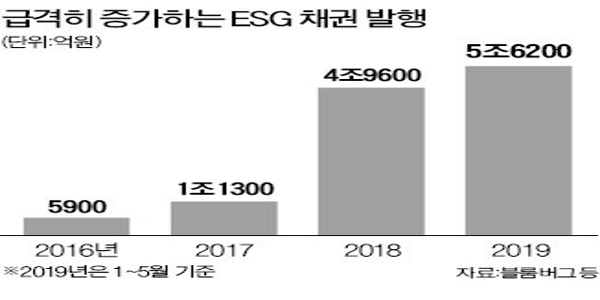

In [2]:
im1 = Image.open('AA.19709256.4.jpg')
im1.resize((600,300))

### OLS에서의 금융데이터

'Under the ordinary least squares (OLS) estimation, the parameter estimates are <font color = "#FF8040">biased downward</font> 

because the OLS fails to <font color = "#FF8040">correct for endogeneity</font>'(Alam, P., &amp; Díaz, A. B., 2004, Abstract)

회계,금융 관련 각 종속변수 및 독립변수는 서로 매우 밀접한 관련이 있고 내생성에 의해 햐항 편향의 관계를 가짐

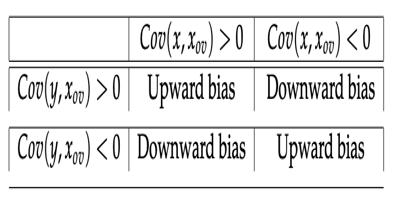

In [3]:
im2 = Image.open('graph.png')
im2.resize((400,200))

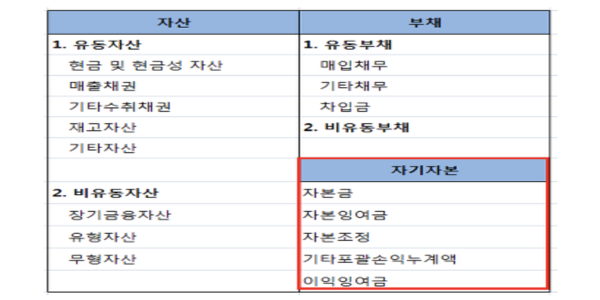

In [4]:
im3 = Image.open('대차대조표.png')
im3.resize((600,300))

OLS는 기본적으로 내선성을 바로 잡는데 한계가 있어 금융 쪽에선

ERC(earnings response coefficient)와 같은 <font color = "#FF8040">관계지표</font>를 살펴보는데 사용 

* ERC(earnings response coefficient): 이익반응계수 , 추가적인 이익이 발생하였을 경우의 반응관계

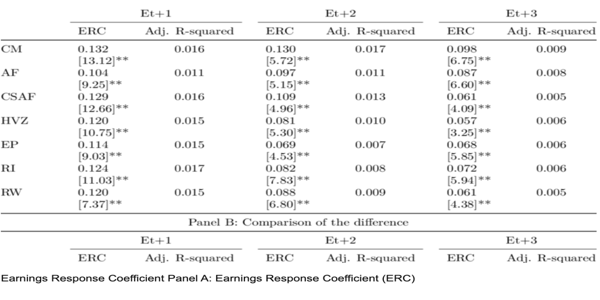

In [5]:
im4 = Image.open('erc.png')
im4.resize((600,300))

### 독립변수 설정

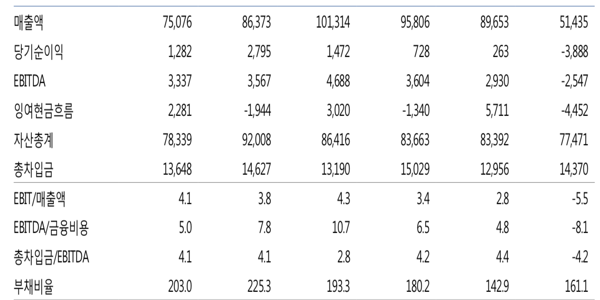

In [6]:
# 나이스 주요 재무제표
im4 = Image.open('나이스_주요재무제표.png')
im4.resize((600,300))

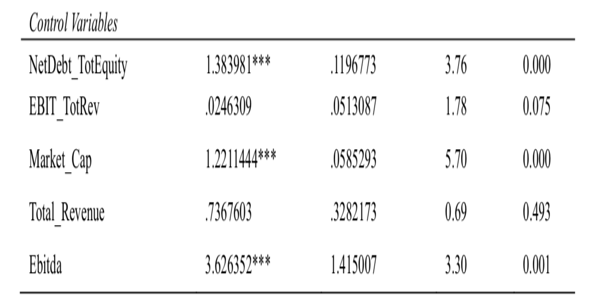

In [7]:
# 'The Linkage between ESG Performance and Credit Ratings: A Firm-Level Perspective Analysis '

#  Published by Canadian Center of Science and Education

im5 = Image.open('The_Linkage_between_ESG_Performance and_Credit_Ratings.png')
im5.resize((600,300))

## NICE 기업신용평가 2011-2019

In [8]:
df1 = pd.read_excel("2011-nice.xls")
df1.tail()

,기업신용평가 502건,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
499,(주)신세계,본,NaN,NaN,AA+,Stable,2011.01.04,2011.01.04,2011.12.14
500,롯데카드(주),수시,AA,Stable,AA,Positive,2011.01.03,2011.01.03,2018.04.29
501,삼성카드(주),수시,AA,Positive,AA+,Stable,2011.01.03,2011.01.03,2026.03.10
502,신한카드(주),수시,AA,Positive,AA+,Stable,2011.01.03,2011.01.03,2018.04.29
503,현대카드(주),수시,AA,Positive,AA+,Stable,2011.01.03,2011.01.03,2018.04.29


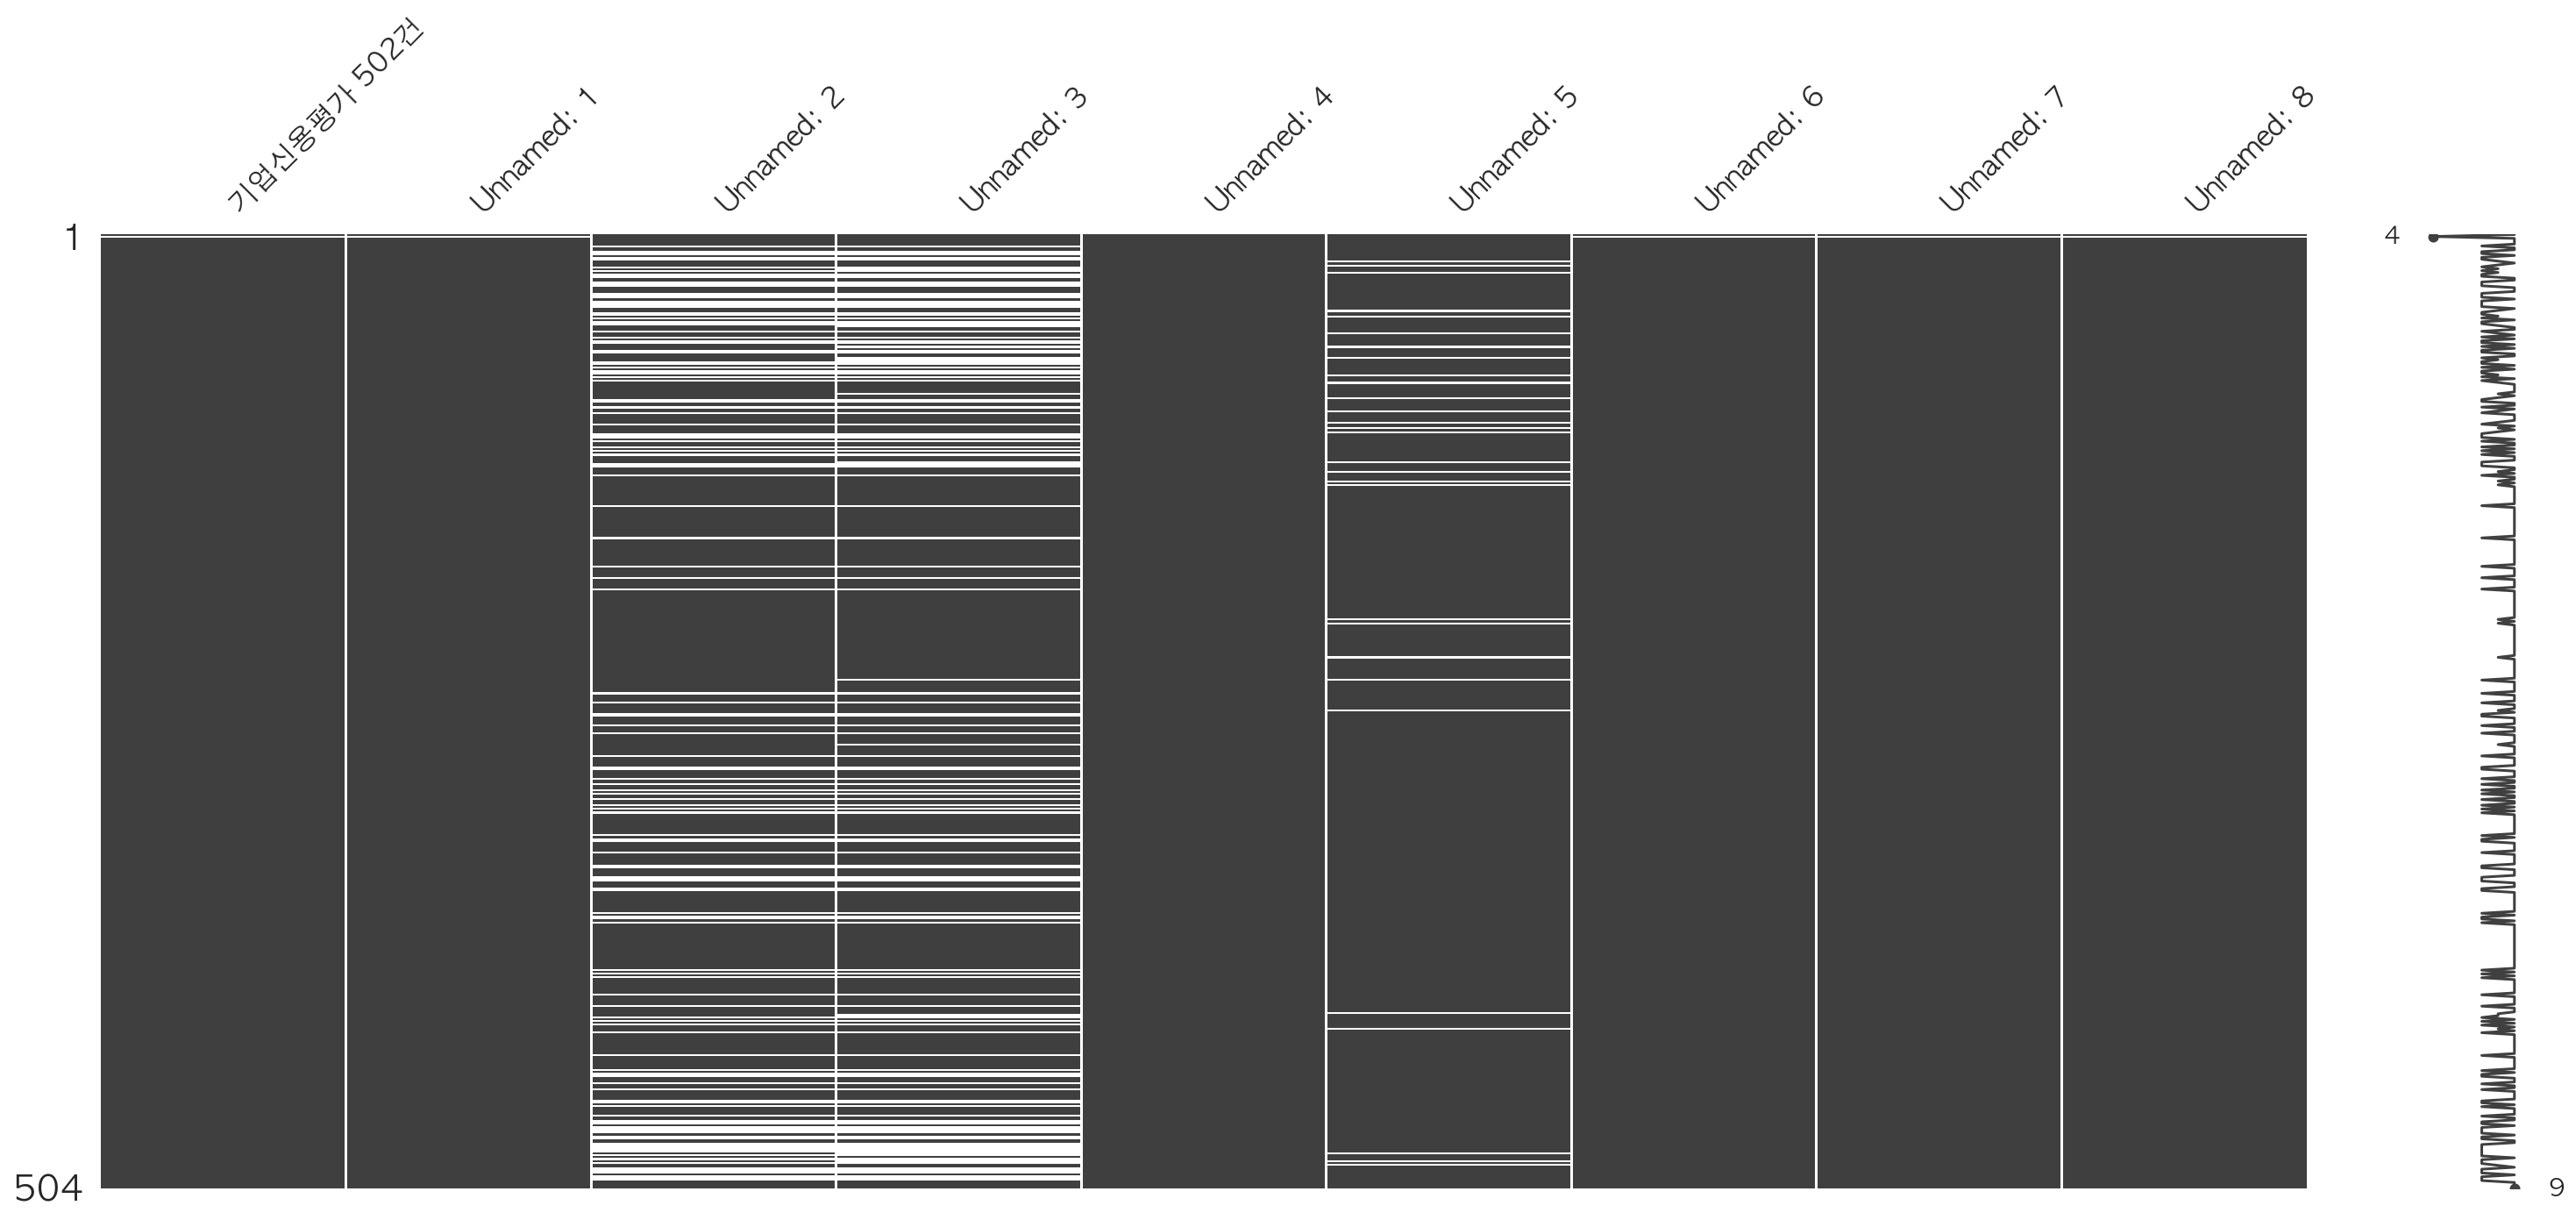

In [9]:
msno.matrix(df1)
plt.show()

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   기업신용평가 502건  503 non-null    object
 1   Unnamed: 1   503 non-null    object
 2   Unnamed: 2   374 non-null    object
 3   Unnamed: 3   362 non-null    object
 4   Unnamed: 4   504 non-null    object
 5   Unnamed: 5   475 non-null    object
 6   Unnamed: 6   503 non-null    object
 7   Unnamed: 7   503 non-null    object
 8   Unnamed: 8   503 non-null    object
dtypes: object(9)
memory usage: 35.6+ KB


In [11]:
def screen_name(df):
    df = df[[df.columns[0],'Unnamed: 4','Unnamed: 6']]
    df.columns = df.loc[0]
    df = df.drop([0,1])
    df["등급결정일"] = df["등급결정일"].apply(lambda x: int(str(x)[:4].replace(".","")))
    df["현재"][df["현재"] == "취소"] = np.nan
    df["기업명"] = df["기업명"].apply(lambda x: str(x).replace("(주)",""))
    df = df.dropna()
    df = df.drop_duplicates(['기업명'],keep="last")
    return df

In [12]:
credit_dlist={"D":0,"C-":1,"C":2,"C+":3,"CC-":4,"CC":5,"CC+":6,"CCC-":7,"CCC":8,"CCC+":9,
              "B-":10,"B":11,"B+":12,"BB-":13,"BB":14,"BB+":15,"BBB-":16,"BBB":17,"BBB+":18,
              "A-":19,"A":20,"A+":21,"AA-":22,"AA":23,"AA+":24,"AAA-":25,"AAA":26,"AAA+":27}
def screen_str(df):
    df["현재"] = df["현재"].astype("str")
    df["현재"] = df["현재"].apply(lambda x: str(x).replace("↓",""))
    df["현재"] = df["현재"].apply(lambda x: str(x).replace("↑",""))
    df["현재"] = df["현재"].apply(lambda x: str(x).replace("◆","")) 
    df['현재'] = df['현재'].apply(credit_dlist.get)
    return df

In [13]:
file_list_n = ["2011-nice.xls","2012-nice.xls","2013-nice.xls","2014-nice.xls","2015-nice.xls","2016-nice.xls",
              "2017-nice.xls","2018-nice.xls","2019-nice.xls"]


mod = sys.modules[__name__]
for i in range(2011,2020):
    setattr(mod, 'df_nice_{}'.format(i),screen_str(screen_name(pd.read_excel(file_list_n[i-2011]))))


In [14]:
df_nice_2019.tail()

,기업명,현재,등급결정일
344,신세계프라퍼티,21,2019
345,에스케이실트론,20,2019
346,현대로템,20,2019
347,HSD엔진,16,2019
348,현대트랜시스,22,2019


<Figure size 3600x5040 with 0 Axes>

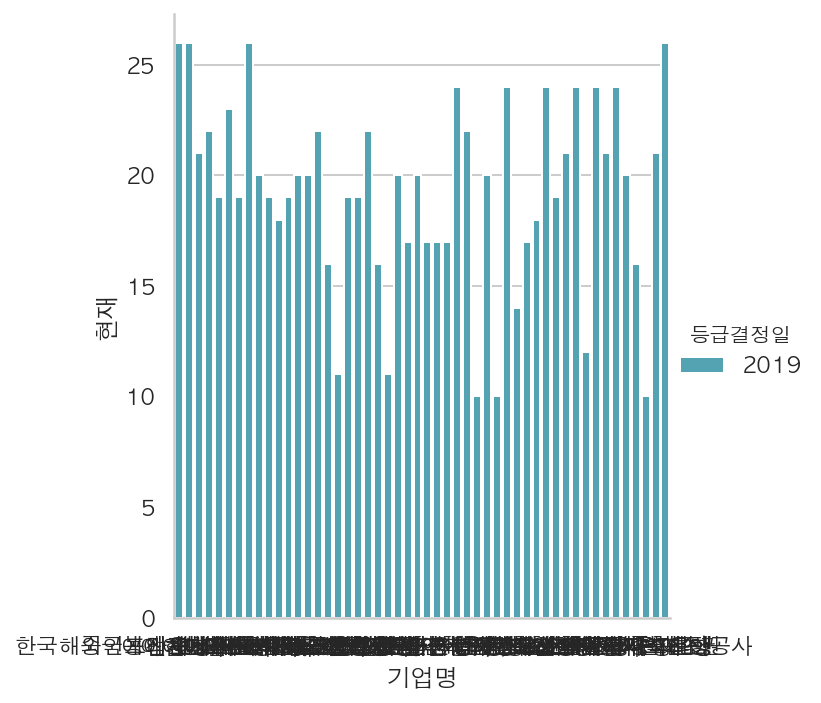

In [53]:
# 2019년 나이스 기업신용평가 점수

plt.figure(figsize=(50,70))
sns.catplot(x="기업명", y="현재", hue="등급결정일", data = df_nice_2019.head(50), kind="bar",facecolor="#54a3b3")
plt.show()

## ESG 기업평가 2011-2019

In [16]:
df_esg = pd.read_csv("2011-2019-ESG.tsv", sep='\t')
df_esg.head()

,NO,기업명,기업코드,ESG등급,지배구조,사회,환경,평가년도,비고
0,6567,AJ네트웍스,95570,B,B,B,C이하,2019,NaN
1,6566,AJ렌터카,68400,C이하,C,B,B,2019,NaN
2,6565,AK홀딩스,6840,B,B,B,C이하,2019,NaN
3,6564,AP시스템,265520,C이하,B,C이하,C이하,2019,NaN
4,6563,BGF,27410,B,B,A,C이하,2019,NaN


In [17]:
df_esg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6567 entries, 0 to 6566
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NO      6567 non-null   int64 
 1   기업명     6567 non-null   object
 2   기업코드    6567 non-null   int64 
 3   ESG등급   6306 non-null   object
 4   지배구조    6563 non-null   object
 5   사회      6346 non-null   object
 6   환경      6154 non-null   object
 7   평가년도    6567 non-null   int64 
 8   비고      188 non-null    object
dtypes: int64(3), object(6)
memory usage: 461.9+ KB


In [18]:
df_esg = df_esg.drop(['NO', '비고'], axis=1).dropna()
df_esg['ESG등급'] = df_esg['ESG등급'].apply({"S":30.0,"A+":25.7,"A":21.4,"B+":17.1,"B":12.9,"C":8.6,"D":4.3, "C이하":8.6, "B이하":12.9}.get) 
df_esg['지배구조'] = df_esg['지배구조'].apply({"S":30.0,"A+":25.7,"A":21.4,"B+":17.1,"B":12.9,"C":8.6,"D":4.3, "C이하":8.6,"B이하":12.9}.get) 
df_esg['사회']    = df_esg['사회'].apply({"S":30.0,"A+":25.7,"A":21.4,"B+":17.1,"B":12.9,"C":8.6,"D":4.3, "C이하":8.6,"B이하":12.9}.get) 
df_esg['환경']    = df_esg['환경'].apply({"S":30.0,"A+":25.7,"A":21.4,"B+":17.1,"B":12.9,"C":8.6,"D":4.3, "C이하":8.6,"B이하":12.9}.get) 
df_esg["기업코드"] = df_esg["기업코드"].apply(lambda x: str(x))
dflist = list(df_esg["기업코드"].values)
for i in range(len(df_esg)):
    if len(dflist[i]) < 3:
        dflist[i] = "0000" + dflist[i]
    elif len(dflist[i]) < 4:
        dflist[i] ="000" + dflist[i]
    elif len(dflist[i]) < 5:
        dflist[i] ="00" + dflist[i]
    elif len(dflist[i]) < 6:
        dflist[i] = "0" + dflist[i]
df_esg["기업코드"] = dflist 

In [19]:
df_esg.tail()

,기업명,기업코드,ESG등급,지배구조,사회,환경,평가년도
6555,화천기계,010660,12.9,12.9,12.9,12.9,2011
6559,효성,004800,12.9,17.1,12.9,17.1,2011
6561,후성,093370,12.9,8.6,12.9,12.9,2011
6562,휴니드테크놀러지스,005870,17.1,8.6,17.1,12.9,2011
6564,휴켐스,069260,12.9,17.1,12.9,17.1,2011


In [20]:
for i in range(2011,2020):
    setattr(mod, 'df_esg_{}'.format(i),df_esg[df_esg["평가년도"]==i])

In [21]:
df_esg_2019[df_esg_2019["평가년도"] == 2018]

,기업명,기업코드,ESG등급,지배구조,사회,환경,평가년도


In [22]:
df_esg_2011.tail()

,기업명,기업코드,ESG등급,지배구조,사회,환경,평가년도
6555,화천기계,010660,12.9,12.9,12.9,12.9,2011
6559,효성,004800,12.9,17.1,12.9,17.1,2011
6561,후성,093370,12.9,8.6,12.9,12.9,2011
6562,휴니드테크놀러지스,005870,17.1,8.6,17.1,12.9,2011
6564,휴켐스,069260,12.9,17.1,12.9,17.1,2011


<Figure size 3600x5040 with 0 Axes>

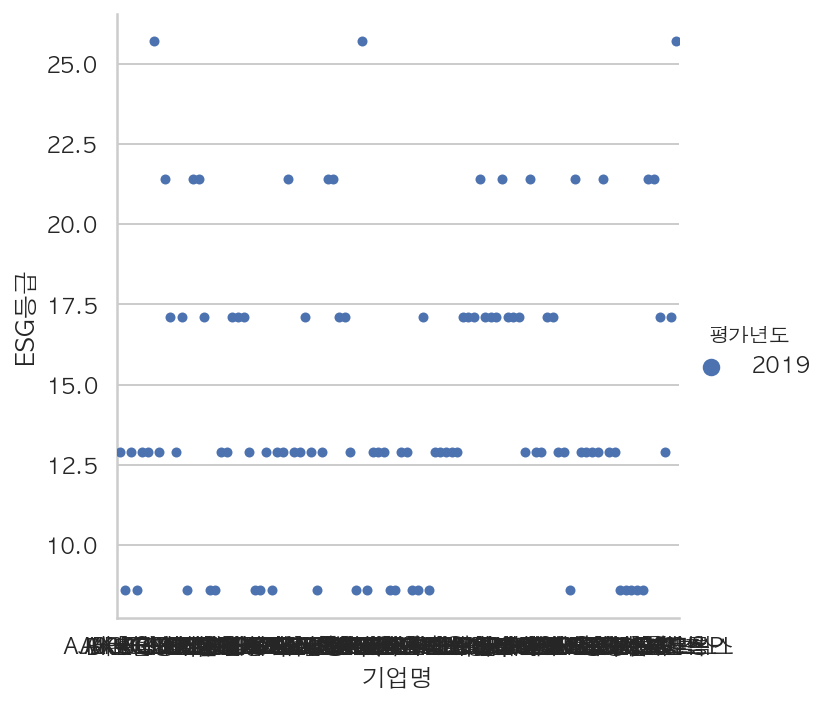

In [23]:
# 2019년 ESG Total 기업 점수

plt.figure(figsize=(50,70))
sns.catplot(x="기업명", y="ESG등급", hue="평가년도",kind="swarm", data=df_esg_2019.head(100))
plt.show()

## 시가총액

In [24]:
df2 = pd.read_csv("marcap-2011.csv")
df2.head()

,Code,Name,Close,Changes,ChagesRatio,Volume,Amount,Open,High,Low,Marcap,MarcapRatio,Stocks,ForeignShares,ForeignRatio,Rank,Date
0,005930,삼성전자,958000,9000,1.0,265562,254246714088,955000,966000,950000,141112764846000,11.27,147299337,74518914.0,50.59,1,2011-01-03
1,005490,POSCO,486000,-1000,-0.2,170542,82998761000,487000,489500,482000,42372801810000,3.38,87186835,43377735.0,49.75,2,2011-01-03
2,005380,현대차,177000,3500,2.0,556135,97468816500,174000,177000,173500,38988936783000,3.11,220276479,94245489.0,42.79,3,2011-01-03
3,009540,현대중공업,435000,-8000,-1.8,256635,111611214500,443000,443500,431000,33060000000000,2.64,76000000,15350207.0,20.20,4,2011-01-03
4,012330,현대모비스,294500,10000,3.5,212902,61730122000,287500,294500,285000,28667767653500,2.29,97343863,46134411.0,47.39,5,2011-01-03


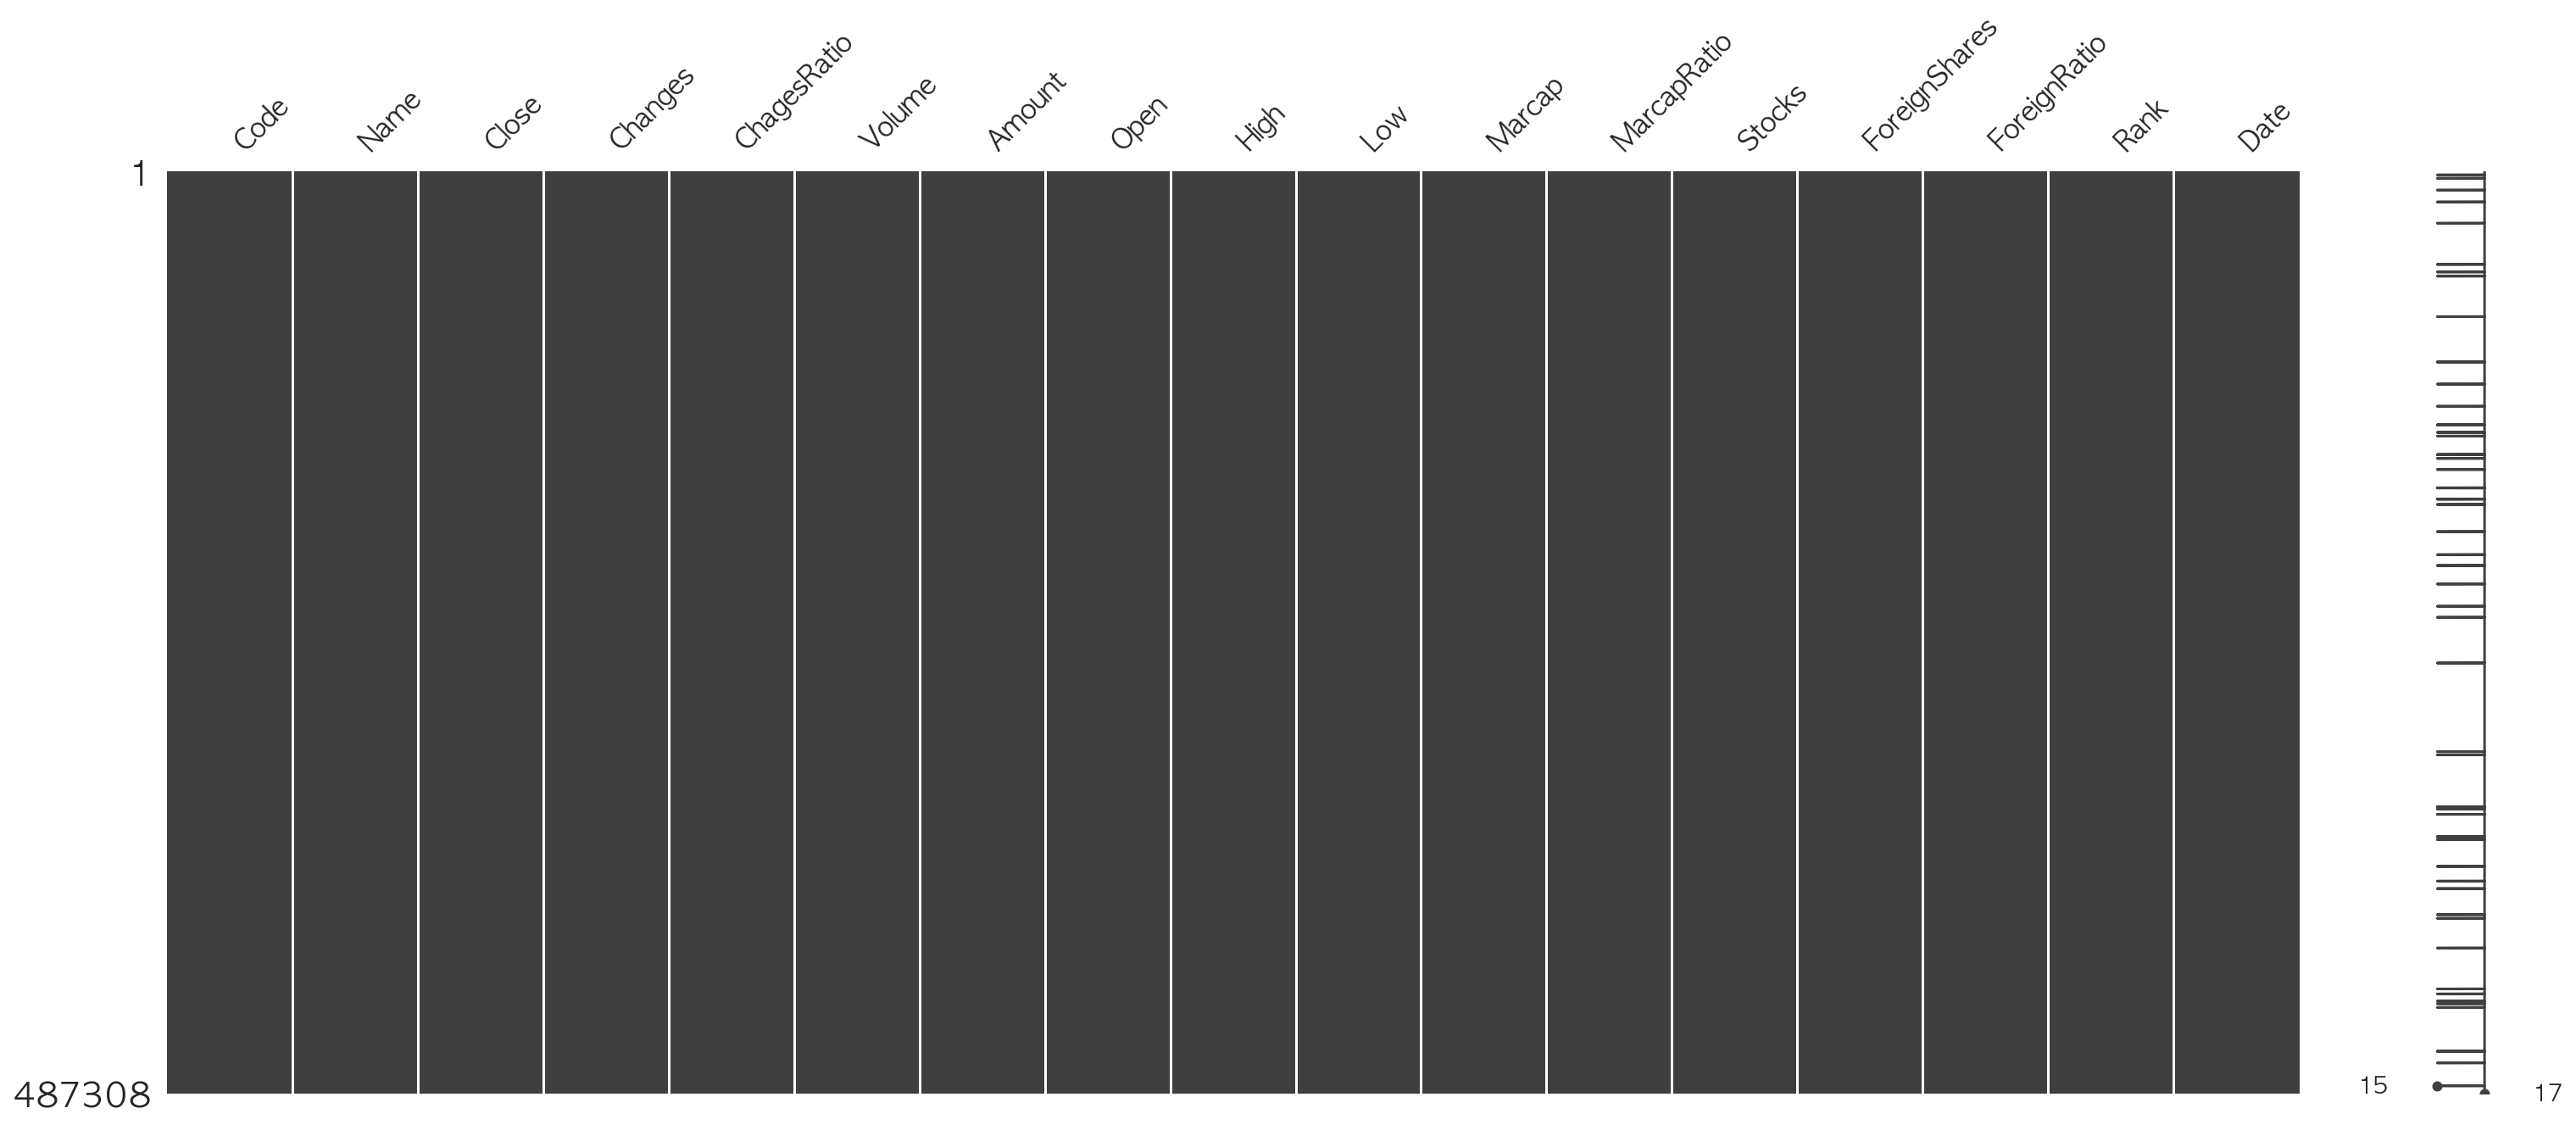

In [25]:
msno.matrix(df2)
plt.show()

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487308 entries, 0 to 487307
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Code           487308 non-null  object 
 1   Name           487308 non-null  object 
 2   Close          487308 non-null  int64  
 3   Changes        487308 non-null  int64  
 4   ChagesRatio    487308 non-null  float64
 5   Volume         487308 non-null  int64  
 6   Amount         487308 non-null  int64  
 7   Open           487308 non-null  int64  
 8   High           487308 non-null  int64  
 9   Low            487308 non-null  int64  
 10  Marcap         487308 non-null  int64  
 11  MarcapRatio    487308 non-null  float64
 12  Stocks         487308 non-null  int64  
 13  ForeignShares  487230 non-null  float64
 14  ForeignRatio   487230 non-null  float64
 15  Rank           487308 non-null  int64  
 16  Date           487308 non-null  object 
dtypes: float64(4), int64(10), obj

In [27]:
file_list_a = ["marcap-2011.csv","marcap-2012.csv","marcap-2013.csv","marcap-2014.csv","marcap-2015.csv",
               "marcap-2016.csv","marcap-2017.csv","marcap-2018.csv","marcap-2019.csv"]

def screen_data(df):
    df = df[["Code","Name","Date","Marcap"]]
    df["Date"] = df["Date"].apply(lambda x: int(str(x).replace("-","")))
    df = df.drop_duplicates(['Name'],keep="last")
    df = df.rename(columns = {"Code":"기업코드"})
    return df
    
for i in range(2011,2020):
    setattr(mod, 'df_market_{}'.format(i),screen_data(pd.read_csv(file_list_a[i-2011])))


In [28]:
df_market_2012.tail()

,기업코드,Name,Date,Marcap
485164,028305,에이치엘비우,20121228,178315500
485165,001385,SG충남방적우,20121228,173250000
485166,012805,대창우,20121228,148088000
485167,007595,동방아그우,20121228,88750000
485168,009815,고려포리머우,20121228,77850000


## 재무상태표

In [ ]:
df3 = pd.read_excel("영업활동현금흐름.xlsx")
df3.tail()

In [ ]:
msno.matrix(df3)
plt.show()

In [ ]:
df3.info()

In [ ]:
df_f = ["영업활동현금흐름.xlsx","EBITDA.xlsx","CAPEX.xlsx","당기순이익.xlsx","총차입부채.xlsx","자산총계.xlsx","매출액.xlsx","EBIT.xlsx",
       "차입부채_EBITDA.xlsx","부채비율.xlsx","차입금의존도.xlsx"]

def change_columns(df):
    columns = ["종목코드","기업명","결산월","단위","2019","2018","2017","2016","2015","2014","2013","2012","2011","2010","2009","2008"]
    df.columns = columns
    df = df.rename(columns = {"종목코드":"기업코드"})
    return df

for i in range(1,12):
    setattr(mod, 'df_balance_{}'.format(i), change_columns(pd.read_excel(df_f[i-1])[9:]))


In [ ]:
df_balance_1.tail()

In [ ]:
def merge_code(dfa,dfb):
    dfb = dfb[["기업코드","기업명"]][dfb["기업명"].isin(dfa["기업명"])]
    dfa = pd.merge(dfa,dfb, on="기업명",how="inner")
    return dfa

In [ ]:
list_nice = [df_nice_2011,df_nice_2012,df_nice_2013,df_nice_2014,df_nice_2015,df_nice_2016,df_nice_2017,
             df_nice_2018,df_nice_2019]

list_esg = [df_esg_2011,df_esg_2012,df_esg_2013,df_esg_2014,df_esg_2015,df_esg_2016,
            df_esg_2017,df_esg_2018,df_esg_2019]

list_marcap = [df_market_2011,df_market_2012,df_market_2013,df_market_2014,df_market_2015,df_market_2016,
               df_market_2017,df_market_2018,df_market_2019]

list_balance = [df_balance_1,df_balance_2,df_balance_3,df_balance_4,df_balance_5,
               df_balance_6,df_balance_7,df_balance_8,df_balance_9,df_balance_10,df_balance_11]

for i in range(2011,2020):
    setattr(mod, 'df_nice_{}'.format(i), merge_code(list_nice[i-2011],list_esg[i-2011]))

In [ ]:
#def interaction_code(dfa,dfb,dfc,dfd):